Output hidden; open in https://colab.research.google.com to view.

Enter the names of the cities:
Enter the weighted adjacency matrix row by row (use 0 for no direct path):

Optimal Cost: 80
Optimal Route: Vizag -> Tadepalligudem -> Guntur -> Eluru


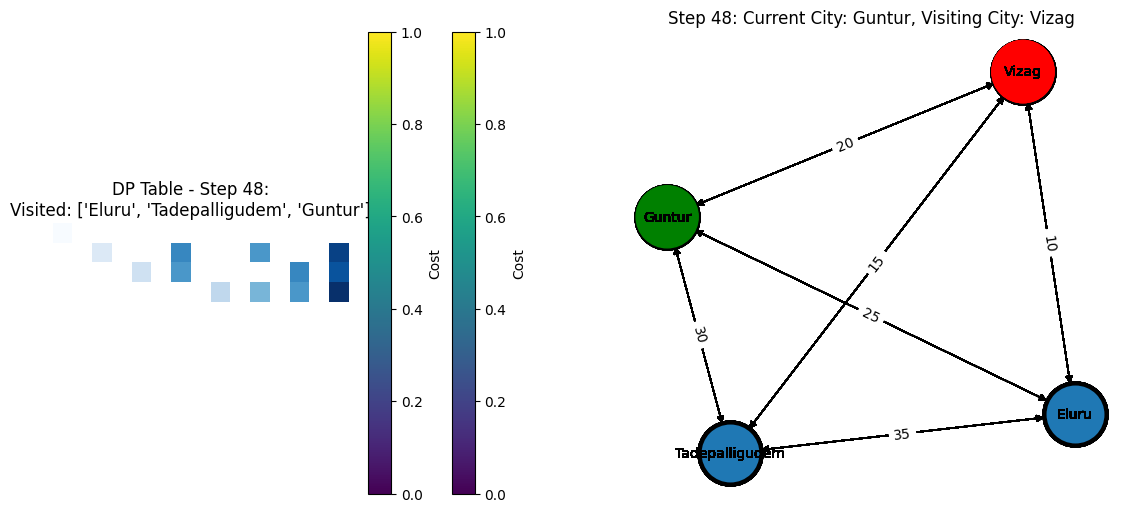

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.animation as animation

def plot_graph_step(cities, matrix, visited, curr_city, next_city, step_num, ax):
    G = nx.DiGraph()
    for i, city in enumerate(cities):
        G.add_node(city)
        for j, weight in enumerate(matrix[i]):
            if weight > 0:
                G.add_edge(city, cities[j], weight=weight)

    pos = nx.spring_layout(G, seed=42)

    # Node colors and styles
    node_colors = []
    node_border = {}
    for i, city in enumerate(cities):
        if i == curr_city:
            node_colors.append("green")  # Current node
        elif i == next_city:
            node_colors.append("red")  # Visiting node
        elif visited & (1 << i):
            node_colors.append("skyblue")  # Already visited
            node_border[city] = 3  # Border for visited nodes
        else:
            node_colors.append("white")  # Unvisited

    # Draw nodes
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, edge_color="black", ax=ax
    )

    # Highlight visited nodes with a border
    for node, linewidth in node_border.items():
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=2000, edgecolors="black", linewidths=linewidth, ax=ax)

    # Draw edges with weights
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

    ax.set_title(f"Step {step_num}: Current City: {cities[curr_city]}, Visiting City: {cities[next_city] if next_city != -1 else 'N/A'}")
    ax.axis('off')

def visualize_dp_and_graph(cities, matrix, dp_table, visited, curr_city, next_city, step_num, frames):
    def func(fig,ax1,ax2,index):
      if index==0:fig.colorbar(None, label="Cost",ax=ax1)
                    # Visualize DP Table in ax1
      ax1.clear()
      ax1.imshow(dp_table, cmap="Blues", interpolation="nearest")
      ax1.set_title(f"DP Table - Step {step_num}:\nVisited: {[cities[i] for i in range(len(cities)) if visited & (1<<i) ]}")
      ax1.set_xlabel("Subset of Cities (as binary)")
      ax1.set_ylabel("Cities")
      ax1.axis('off')

      # Plot the graph in ax2
      plot_graph_step(cities, matrix, visited, curr_city, next_city, step_num, ax2)

    frames.append(func)

def tsp(cities, matrix):
    n = len(cities)
    dp = [[float('inf')] * (1 << n) for _ in range(n)]
    dp[0][1] = 0  # Starting from the first city

    # Step counter for visualization
    step_num = 0
    frames = []


    # Visualize the initial state
    visualize_dp_and_graph(cities, matrix, dp, 1, 0, -1, step_num, frames)

    for visited in range(1 << n):
        for curr_city in range(n):
            if not (visited & (1 << curr_city)):
                continue
            for next_city in range(n):
                if visited & (1 << next_city):
                    continue
                next_visited = visited | (1 << next_city)
                dp[next_city][next_visited] = min(
                    dp[next_city][next_visited],
                    dp[curr_city][visited] + matrix[curr_city][next_city]
                )
                # Visualize DP table and graph at each step
                step_num += 1
                visualize_dp_and_graph(cities, matrix, dp, visited, curr_city, next_city, step_num, frames)

    # Find the minimum cost to return to the starting city
    min_cost = float('inf')
    last_city = -1
    for i in range(1, n):
        cost = dp[i][(1 << n) - 1] + matrix[i][0]
        if cost < min_cost:
            min_cost = cost
            last_city = i

    # Reconstruct the path
    route = []
    visited = (1 << n) - 1
    curr_city = last_city
    while curr_city != 0:
        route.append(cities[curr_city])
        for i in range(n):
            if visited & (1 << i) and dp[curr_city][visited] == dp[i][visited ^ (1 << curr_city)] + matrix[i][curr_city]:
                visited ^= (1 << curr_city)
                curr_city = i
                break
    route.append(cities[0])
    route.reverse()

    # Return final result
    return min_cost, route, frames

def animate(frames):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    ani = animation.FuncAnimation(fig, lambda i: frames[i](fig,ax1,ax2,i), frames=len(frames), interval=1000, repeat=False)
    ani.save('tsp-visualisation.mp4')
    plt.show()

print("Enter the names of the cities:")
# cities = input().split()
cities = "Vizag Eluru Tadepalligudem Guntur".split()

n = len(cities)
print("Enter the weighted adjacency matrix row by row (use 0 for no direct path):")
# matrix = [list(map(int, input().split())) for _ in range(n)]
matrix = [[0, 10, 15, 20],
          [10, 0, 35, 25],
          [15, 35, 0, 30],
          [20, 25, 30, 0 ]]
# Solve TSP
cost, route, frames = tsp(cities, matrix)

# Output the result
print("\nOptimal Cost:", cost)
print("Optimal Route:", " -> ".join(route))

# Animate the steps
animate(frames)
